In [289]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [290]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans

In [291]:
# Import My own library for factor testing
from SingleFactorTest import factorFilterFunctions as ff
#from config import *

In [292]:
%matplotlib inline

In [293]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [294]:
# make sure that matplotib and seaborn can show Chinese
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [295]:
# Files to use 
filenamePrice = 'Own_Factor_AdjustedPriceForward-1d.csv'
filenameST = 'LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday = 'LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag = 'LZ_GPA_SLCIND_STOP_FLAG.csv'
filenameIndu = 'LZ_GPA_INDU_ZX.csv'
filenameFCAP = 'LZ_GPA_VAL_A_FCAP.csv'
filenameAdjustFactor = 'LZ_GPA_CMFTR_CUM_FACTOR.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'
filenameZXIndustry = 'LZ_GPA_INDU_ZX.csv'
filenameZXExplanation = 'LZ_GPA_TMP_INDU_ZX.csv'

In [296]:
# Factors
# Value factor
filenamePE ='LZ_GPA_VAL_PE.csv'  # 市盈率   012-2016 Cum return 0.9(group1),1.4(group8) monotonicity: Normal
filenamePB ='LZ_GPA_VAL_PB.csv'  # 市净率   012-2016 Cum return 1.1(group2),0.1(group9) monotonicity: Good+
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率   012-2016 Cum return 0.9(group0),0.3(group9) monotonicity: Good+
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率   2012-2016 Cum return 0.95(group0),0.35(group8) monotonicity: Normal
filenameADJPB ='Own_Factor_AdjustedPB-1d.csv' # 市值调整市净率 2012-2016 Cum return 1.1(group2),0.2(group9) monotonicity: Normal

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%) 2012-2016 Cum return 1.1(group8),0.41(group1) monotonicity: Good+
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%) 2012-2016 Cum return 1.2(group9),0.2(group1) monotonicity: Good
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%) 2012-2016 Cum return 0.98(group8),0.4(group2) monotonicity: Good
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%) 2012-2016 Cum return 1.17(group7),0.18(group1) monotonicity: Normal
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)  2012-2016 Cum return 0.85(group4),0.5(group0) monotonicity: Normal

# Financial factor
filenameCAPITALIZEDTODA = 'LZ_GPA_FIN_IND_CAPITALIZEDTODA.csv'  # 资本支出/折旧和摊销 2012-2016 Cum return 0.95(group0),0.6(group9) monotonicity: Normal+
filenameCASHRATIO = 'LZ_GPA_FIN_IND_CASHRATIO.csv' # 保守速动比率 2012-2016 Cum return 0.85(group0),0.53(group2) monotonicity: Normal+
filenameCASHTOLIQDEBT = 'LZ_GPA_FIN_IND_CASHTOLIQDEBT.csv' # 货币资金／流动负债 2012-2016 Cum return 0.8(group7),0.6(group8) monotonicity: Normal
filenameOCFTODEBT = 'LZ_GPA_FIN_IND_OCFTODEBT.csv' # 经营活动产生的现金流量净额/负债合计 2012-2016 Cum return 0.8(group0),0.55(group4) monotonicity: Normal
filenamePROFITTOOP = 'LZ_GPA_FIN_IND_PROFITTOOP.csv' # 利润总额／营业收入 2012-2016 Cum return 0.84(group3),0.23(group9) monotonicity: Normal
filenamePROFITTOOPTTM ='LZ_GPA_FIN_DERI_COMBO_EBTTOOR_TTM.csv' # # 利润总额／营业收入(TTM) 2012-2016 Cum return 0.72(group8),0.41(group1) monotonicity: Good

filenameBERYRATIO = 'LZ_GPA_DERI_BerryRatio.csv' #边际毛利/营运开支 2012-2016  monotonicity: bad ,not useful at all

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量 2012-2016 Cum return 1.0(group3), - 0.3(group9) monotonicity: Normal+
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转 2012-2016 Cum return 0.85(group0), - 0.2(group9) monotonicity: Good
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转 2012-2016 Cum return 0.65(group7), 0.4(group9) monotonicity: Normal
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度  2012-2016 Cum return 0.47(group0), -0.3(group9) monotonicity: Good
filenameABORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量  2012-2016 Cum return 0.7(group0), 0.1(group9) monotonicity: Normal
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv' # 斜率   2012-2016 Cum return 1.1(group0), 0.25(group8) monotonicity: Good+
filenameMACD = 'LZ_GPA_DERI_MACD.csv'  # MACD   2012-2016 Cum return 0.8(group3), -0.4(group9) monotonicity: Normal
finenameBB = 'LZ_GPA_DERI_BB_20.csv'  # Bolling_bands  2012-2016 Cum return 0.75(group3) , 0.05(group9)  monotonicity: Normal 

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值 2012-2016 Cum return 0.7(group4) , 0.1(group9)  monotonicity: Normal 
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'    #  日均成交额   2012-2016 Cum return 1.52(group0) , -0.27(group9)  monotonicity: Perfect
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'         # 非流动性因子  2012-2016 Cum return 1.5(group9), - 0.07(group1) monotonicity: Perfect
filenameTURNOVER = 'LZ_GPA_VAL_TURN.csv'    # 换手率 2012-2016 Cum return  0.78(group6), - 0.25(group9) monotonicity: Normal（除了第九组外其他差不多）
filenameOWNILLIQ ='Own_Factor_ILLQ-1d.csv' # 非流动性 2012-2016 Cum return 1.5(group9), - 0.25(group0) monotonicity: Perfect
filenameADJILLIQ = 'Own_Factor_ADJ_ILLQ_1D.csv' # 非流动性(市值调整) 
filenameADJTURNOVER = 'LZ_GPA_DERI_adjustedTurnOver_20.csv' # 市值调整日均成交额 2012-2016 Cum return 1.25(group0), - 0.5(group9) monotonicity: Perfect

# Volatility factor
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动   2012-2016 Cum return  0.65(group8), 0.4(group1) monotonicity : Normal
filenameOwnVol = 'Own_Factor_Volatility_90d.csv'   # 90天收益波动率     2012-2016 Cum return 0.65(group1), - 0.26(group9) monotonicity: Good
filenameAbove20 = 'Own_Factor_Above20MA_20d.csv'  # 高于20天MA的价格平均 2012-2016 Cum return 0.8(group1) , -0.4(group9)  monotonicity：Good

filenameTOV20 = 'Own_Factor_Turnover_Volatility_20D.csv' # 20天换手率波动率
filenameADJTOV20 = 'Own_Factor_ADJ_Turnover_Volatility_20D.csv' # 20天换手率波动率（市值调整） 2012-2016 Cum return 1.8(group0), -0.3(group9) monotonicity: perfect
filenameTOVD20 = 'Own_Factor_Turnover_Volatility_deviation_20D.csv' # 20天换手率均值除500天换手率均值-1
filenameADJTOVD20 = 'Own_Factor_ADJ_Turnover_Volatility_Deviation_20D.csv' # 20天换手率均值除500天换手率均值-1(市值调整)  Cum return 0.7(group0), -0.2(group9)Good

In [297]:
#
#filenameSpecificVol = 'Own_Factor_Specific_Volatility.csv' # 特质波动率
filenameAroon = 'Aroon_Allstocks.csv' 
filenameAdjTOTrue = 'Own_Factor_AdjustedTurnOver-1d.csv'# 真市值调整换手率 2012-2016 Cum return 1.0(group7), - 0.4(group9) monotonicity: Normal
filenameDDA = 'Own_Factor_DDA-1d.csv'  # 股票每日成交额(前复权)  2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filennameQFAEPS = 'LZ_GPA_FIN_IND_QFA_EPS.csv' # 单季度每股收益
filenameDDA20 = 'Own_Factor_DDA-20d.csv' # DDA二十天均值   2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filenameADJDDA20 ='Own_Factor_ADJ_DDA_20D.csv' # 中性化（仅去市值）后的DDA20
filenameIDIVOL = 'Own_Factor_Idiosyncratic_Volatility.csv' # 特异波动率  2012-2016 Cum return 0.9(group1), 0(group9) monotonicity: Good+
filenameOwnSkewness = 'Own_Factor_Skewness_250d.csv'  # 250日偏度
filenameOwnReturnSkew = 'Own_Factor_Return_Skew_250D.csv' # 250日收益率偏度
filenamePPO ='LZ_GPA_DERI_PPO.csv' #
filename_5_20_deviation = 'Own_Factor_5_20_price_deviation_1D.csv'  #  5日价格平均除以20日价格平均
filename_5_20_return_deviation = 'Own_Factor_5_20_return_deviation_1D.csv'  # 5日平均收益除以20日平均收益
filenameSharpe = 'Own_Factor_sharpe_ratio_20D.csv'  # 20日夏普比率
filenameDownsideRisk = 'Own_Factor_downside_risk_252D.csv' # 252日下行波动率  不太好的因子
filenameSortinoRatio = 'Own_Factor_sortino_ratio_20D.csv'  # 20日sortino比率   不太好的因子

In [298]:
# Uqer factor
filenameUQAD20 = 'Uqer_factor_AD20.csv'    #累积/派发线（Accumulation / Distribution Line)的20日均线
filenameUQADTM = 'Uqer_factor_ADTM.csv'    #动态买卖气指标，用开盘价的向上波动幅度和向下波动幅度的距离差值来描述人气高低的指标。属于情绪类因子
filenameUQATR6 = 'Uqer_factor_ATR6.csv'    #6日均幅指标（Average TRUE Ranger），取一定时间周期内的股价波动幅度的移动平均值 # perfect!
filenameUQAroon = 'Uqer_factor_Aroon.csv'   #Aroon通过计算自价格达到近期最高值和最低值以来所经过的期间数
filenameUQBias10 = 'Uqer_factor_BIAS10.csv' # 10日乖离率，简称Y值，是移动平均原理派生的一项技术指标，表示股价偏离趋向指标斩百分比值

In [547]:
# Not good factors but maybe useful
filenameOVERVOL = 'Over_Heat_Volume.csv' 
filenameSIZE = 'LZ_GPA_VAL_A_FCAP.csv'
filenameExcessReturn = 'Own_Factor_excess_return_20D.csv'

In [300]:
# Non_linear factor
filenameNLFCAP ='Own_factor_Nonlinear_FCAP.csv'

In [301]:
# Constants
startTime =  datetime.strptime('20100101', '%Y%m%d')
endTime = datetime.strptime('20170228', '%Y%m%d')

path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HS300Index ='000300.SH' # HS300 index code
ZZ500Index = '000905.SH' #   ZZ500 index code

In [302]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
indusDF = pd.read_csv(path+filenameZXIndustry,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
induExplanation = pd.read_csv(path+filenameZXExplanation,infer_datetime_format=True,parse_dates=[0],encoding='gb2312')

In [3168]:
#
sololist = [filenameUQBias10]
#
filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'TURNOVER_1M':filenameTURNOVER1M }

In [3169]:
induExplanation

LZ_GPA_TMP_INDU_ZX-t
0                  石油石化
1                    煤炭
2                  有色金属
3               电力及公用事业
4                    钢铁
5                  基础化工
6                    建筑
7                    建材
8                  轻工制造
9                    机械
10                 电力设备
11                 国防军工
12                   汽车
13                 商贸零售
14                 餐饮旅游
15                   家电
16                 纺织服装
17                   医药
18                 食品饮料
19                 农林牧渔
20                   银行
21                非银行金融
22                  房地产
23                 交通运输
24                电子元器件
25                   通信
26                  计算机
27                   传媒
28                   综合

In [3170]:
explanationDict = induExplanation.iloc[:,0].to_dict()

In [3171]:
sololist[0]

'Uqer_factor_BIAS10.csv'

In [3172]:
sparedata = pd.read_csv(path+sololist[0],infer_datetime_format=True,parse_dates=[0],index_col=0)

In [3173]:
sparedata.tail()

000001.XSHE  000002.XSHE  000004.XSHE  000005.XSHE  000006.XSHE  \
2017-05-09      -2.2403      -3.6382          NaN      -4.4963      -3.3480   
2017-05-10      -1.5332      -2.4301          NaN      -7.0547      -4.8613   
2017-05-11      -0.8660       1.1407          NaN      -7.8712      -2.5262   
2017-05-12       1.4939       2.1752          NaN      -5.6399      -1.1736   
2017-05-15       1.1878       1.9451          NaN      -5.7640      -2.3481   

            000007.XSHE  000008.XSHE  000009.XSHE  000010.XSHE  000011.XSHE  \
2017-05-09          NaN      -7.5779      -3.9810      -4.6379      -1.9013   
2017-05-10          NaN      -5.7015      -6.6251      -7.3525      -1.9045   
2017-05-11          NaN      -3.6864      -6.1135      -9.5318       1.7164   
2017-05-12          NaN      -3.5053      -5.9097      -9.1681       4.5222   
2017-05-15          NaN      -2.4520      -4.7619      -8.2600       0.7625   

               ...       603987.XSHG  603988.XSHG  603989.XSHG  603990.XSHG  \
2017-05-09     ...           -2.7825      -0.8697       0.1332      -3.5100   
2017-05-10     ...           -4.3619      -1.5507       2.0051      -7.5382   
2017-05-11     ...           -2.7352      -1.6204       3.1258      -8.3205   
2017-05-12     ...           -1.8533       3.5256       2.4744      -7.1777   
2017-05-15     ...           -1.0568       3.1417       3.5188      -6.3400   

            603991.XSHG  603993.XSHG  603996.XSHG  603997.XSHG  603998.XSHG  \
2017-05-09      -3.6604      -1.0061      -5.0019      -0.0176      -2.8419   
2017-05-10      -4.7776      -4.3305      -6.6020      -0.3003      -3.9737   
2017-05-11      -4.3187      -3.4767      -5.9818      -0.5537      -5.8752   
2017-05-12      -3.0513      -4.1214      -6.3345      -0.0680      -5.2653   
2017-05-15      -2.3968      -2.2908      -4.5386      -0.3626      -5.0801   

            603999.XSHG  
2017-05-09      -1.6980  
2017-05-10      -2.8596  
2017-05-11      -5.3229  
2017-05-12      -5.9641  
2017-05-15      -5.1046  

[5 rows x 3243 columns]

In [3174]:
# adjust the columns name of the Uqer data same as the own factor
if 'Uqer' in sololist[0]: 
    uqercolumnList = sparedata.columns.tolist()
    uqercolumnName = [x.split('.')[0] for x in uqercolumnList]
    newcolumnList = stDF.columns.tolist()
    newcolumnName = [x.split('.')[0] for x in newcolumnList]
    columndict = dict(zip(newcolumnName,newcolumnList))
    finalcolumns = []
    for stk in uqercolumnName:
        if stk in newcolumnName:
            stk = columndict[stk]
        else:
            pass
        finalcolumns.append(stk)
    sparedata.columns = finalcolumns
    addNanColumns = list(set(newcolumnList) - set(sparedata.columns))
    addData = pd.DataFrame(index = sparedata.index,columns = addNanColumns,dtype =float)
    sparedata = pd.concat([sparedata,addData],axis=1)
    sparedata = sparedata[newcolumnList]

In [3175]:
stDF

000005.SZ  600601.SH  600602.SH  600651.SH  \
LZ_GPA_SLCIND_ST_FLAG-t                                               
2010-01-04                     NaN        NaN        NaN        NaN   
2010-01-05                     NaN        NaN        NaN        NaN   
2010-01-06                     NaN        NaN        NaN        NaN   
2010-01-07                     NaN        NaN        NaN        NaN   
2010-01-08                     NaN        NaN        NaN        NaN   
2010-01-11                     NaN        NaN        NaN        NaN   
2010-01-12                     NaN        NaN        NaN        NaN   
2010-01-13                     NaN        NaN        NaN        NaN   
2010-01-14                     NaN        NaN        NaN        NaN   
2010-01-15                     NaN        NaN        NaN        NaN   
2010-01-18                     NaN        NaN        NaN        NaN   
2010-01-19                     NaN        NaN        NaN        NaN   
2010-01-20                     NaN        NaN        NaN        NaN   
2010-01-21                     NaN        NaN        NaN        NaN   
2010-01-22                     NaN        NaN        NaN        NaN   
2010-01-25                     NaN        NaN        NaN        NaN   
2010-01-26                     NaN        NaN        NaN        NaN   
2010-01-27                     NaN        NaN        NaN        NaN   
2010-01-28                     NaN        NaN        NaN        NaN   
2010-01-29                     NaN        NaN        NaN        NaN   
2010-02-01                     NaN        NaN        NaN        NaN   
2010-02-02                     NaN        NaN        NaN        NaN   
2010-02-03                     NaN        NaN        NaN        NaN   
2010-02-04                     NaN        NaN        NaN        NaN   
2010-02-05                     NaN        NaN        NaN        NaN   
2010-02-08                     NaN        NaN        NaN        NaN   
2010-02-09                     NaN        NaN        NaN        NaN   
2010-02-10                     NaN        NaN        NaN        NaN   
2010-02-11                     NaN        NaN        NaN        NaN   
2010-02-12                     NaN        NaN        NaN        NaN   
...                            ...        ...        ...        ...   
2017-01-11                     NaN        NaN        NaN        NaN   
2017-01-12                     NaN        NaN        NaN        NaN   
2017-01-13                     NaN        NaN        NaN        NaN   
2017-01-16                     NaN        NaN        NaN        NaN   
2017-01-17                     NaN        NaN        NaN        NaN   
2017-01-18                     NaN        NaN        NaN        NaN   
2017-01-19                     NaN        NaN        NaN        NaN   
2017-01-20                     NaN        NaN        NaN        NaN   
2017-01-23                     NaN        NaN        NaN        NaN   
2017-01-24                     NaN        NaN        NaN        NaN   
2017-01-25                     NaN        NaN        NaN        NaN   
2017-01-26                     NaN        NaN        NaN        NaN   
2017-02-03                     NaN        NaN        NaN        NaN   
2017-02-06                     NaN        NaN        NaN        NaN   
2017-02-07                     NaN        NaN        NaN        NaN   
2017-02-08                     NaN        NaN        NaN        NaN   
2017-02-09                     NaN        NaN        NaN        NaN   
2017-02-10                     NaN        NaN        NaN        NaN   
2017-02-13                     NaN        NaN        NaN        NaN   
2017-02-14                     NaN        NaN        NaN        NaN   
2017-02-15                     NaN        NaN        NaN        NaN   
2017-02-16                     NaN        NaN        NaN        NaN   
2017-02-17                     NaN        NaN        NaN        NaN   
2017-02-20                     NaN        NaN    

In [3176]:
## easy way to calculate the last day of the month
#stDF['label'] = stDF.index.map(lambda x: (x.year,x.month))
#locationList=(stDF.groupby(['label']).size().cumsum()-1).values
#stDF.iloc[locationList].index
#stDF.groupby(['label'])

In [3177]:
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime][ZZ500Index]

In [3178]:
LFCAPDF = np.log10(ff.getData(thresholdNum, startTime, endTime,filename = filenameFCAP))

In [3179]:
#fs = np.log10(pd.read_csv(path+ filenameFCAP ,infer_datetime_format=True,parse_dates=[0],index_col=0))

#fs[fs>fs.quantile(0.9,axis=1)] = np.NaN
#fs.to_csv(path+'Own_factor_Nonlinear_FCAP.csv',na_rep='NaN',date_format='%Y%m%d')

In [3180]:
#fs[fs<fs.quantile(0.4,axis=1)]

In [3181]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [3182]:
# calculate correlation between two factors
if  'Uqer' in sololist[0]:
    factor1 = sparedata.loc[startTime:endTime]
else:
    factor1 = pd.read_csv(path+sololist[0],infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
correlationDF = ff.showCorrelation(factor1,LFCAPDF, endOfMonthList, filterdic = None).astype(float)
correlationDF.describe()

Pearson   Spearman
count  86.000000  86.000000
mean    0.060522   0.057597
std     0.151738   0.171162
min    -0.206666  -0.234905
25%    -0.059556  -0.077692
50%     0.031811   0.049995
75%     0.172780   0.181055
max     0.368495   0.409640

In [3183]:
factor1

000005.SZ  600601.SH  600602.SH  600651.SH  600652.SH  600653.SH  \
2010-01-04     2.6036     3.7900     8.8276     2.9835     1.9320     0.5243   
2010-01-05     5.2810     6.6227     8.1528     3.8065     5.2370     0.3650   
2010-01-06     2.1505     3.0797     4.5293     4.6553     2.6471    -0.0454   
2010-01-07    -2.6223    -0.2050    -0.4648     1.4384     0.1087    -2.7715   
2010-01-08    -1.9804     3.0516     2.9588     1.0502     0.6533    -1.9340   
2010-01-11    -2.7569     5.2014     1.6868     2.2084     0.6162    -2.2111   
2010-01-12     2.2519     4.8373     1.7942     1.9264     1.7623    -0.0912   
2010-01-13     0.6667     6.5431     0.8901    -1.6211    -1.3029    -1.3730   
2010-01-14     1.0488     5.6626     2.7820     1.3634     0.6445     2.0595   
2010-01-15     1.2637     5.4333     1.4531     0.9606     1.3911     1.6484   
2010-01-18     3.0313     4.2281     2.5984     5.7116     2.9017     3.0151   
2010-01-19     1.2112     1.8012     2.8094     4.3672     2.1213     8.4446   
2010-01-20    -1.9640    -3.5670    -2.1795    -1.5170    -2.4232     4.4810   
2010-01-21    -2.0619    -3.4250    -1.3036    -1.6254    -1.1711     5.0401   
2010-01-22    -5.8274    -5.0822    -4.1964    -6.0726    -3.2331     2.3256   
2010-01-25    -8.4341    -6.1528    -4.9132    -6.1069    -4.2767    -0.5951   
2010-01-26   -12.0260    -6.8768    -8.3497    -7.1938    -7.5824    -5.0563   
2010-01-27   -11.3001    -6.3825    -7.1512    -8.9340    -7.6069    -5.0353   
2010-01-28    -9.4759    -3.0870    -4.6248    -7.0313    -5.7012    -3.8973   
2010-01-29    -3.6984    -2.5941    -3.3806    -6.0247    -4.9962    -3.4835   
2010-02-01    -1.5948    -3.2494    -2.1310    -6.8550    -4.3294    -4.7513   
2010-02-02    -2.7037    -2.0200    -1.4472    -1.1058    -4.0817    -3.8375   
2010-02-03    -1.4504     0.0314     1.5363    -0.3789     0.0520    -1.7735   
2010-02-04     3.3514     0.9480     3.6577     1.3538     0.0098    -0.2751   
2010-02-05     1.3920    -1.1891        NaN    -1.7468     2.6605    -0.9009   
2010-02-08     2.0139    -0.9764     3.1832    -0.3579     2.6425     1.2746   
2010-02-09    -1.2021     0.1426     2.8693     0.1185     3.2852     1.7341   
2010-02-10    -0.6362     0.3707     4.8482     0.8995     3.7409     1.7066   
2010-02-11    -0.9698    -0.4077     4.8842     0.5785     1.6655     0.5071   
2010-02-12    -0.1493     0.4215     3.7999     0.8850     1.5604     1.5193   
...               ...        ...        ...        ...        ...        ...   
2017-01-11    -0.8097    -0.1911    -0.1047    -0.2251    -0.1389    -0.4480   
2017-01-12    -1.7224    -0.3400    -1.3701    -0.1405    -1.4367    -1.7946   
2017-01-13    -3.2024    -2.1068    -3.5198    -3.4256    -0.8264    -2.8472   
2017-01-16    -6.2455    -5.1890    -6.2434    -9.4525    -8.3262    -6.7371   
2017-01-17    -5.1800    -4.5474    -0.6972    -9.2912    -5.7641    -6.7174   
2017-01-18    -3.5062    -4.5769    -3.2498    -8.5354    -6.0121    -6.2740   
2017-01-19    -4.3801    -4.2854    -3.7227    -7.1709    -4.1983    -6.9707   
2017-01-20    -2.7237    -1.8365    -2.1084    -4.8424    -2.2544    -4.2637   
2017-01-23    -1.4786    -1.0119    -1.2666    -3.5987    -1.4427    -2.5871   
2017-01-24    -1.0337    -0.6197    -1.2735    -3.6795    -1.4039    -1.8667   
2017-01-25    -0.3667     0.4444    -0.2734    -2.3107     0.1068    -1.0221   
2017-01-26     0.5981     0.8253     0.7565    -0.9084     0.4291    -0.0812   
2017-02-03     0.3689     0.8046     2.7465     0.1158    -1.1812     1.9299   
2017-02-06     0.6444     1.0484        NaN     2.6261    -0.8223     2.0630   
2017-02-07     1.0720     0.6682        NaN     1.6452    -1.4471     1.5985   
2017-02-08     0.8571     0.6443        NaN     1.6400     0.4233     1.8368   
2017-02-09     1.1750     1.3499        NaN     1.6243     0.6216     2.0682   
2017-02-10     1.1116     1.5453        NaN     0.6760     0.1741     2.8862   
2017-02-13  

In [3184]:
#%lprun -f ff.getLastDayOfMonth ff.getLastDayOfMonth(LFCAPDF.index)

In [3185]:
activeReturnData = ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = False)

In [3186]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2010-01-29 00:00:00 296
2010-02-26 00:00:00 331
2010-03-31 00:00:00 340
2010-04-30 00:00:00 342
2010-05-31 00:00:00 348
2010-06-30 00:00:00 346
2010-07-30 00:00:00 331
2010-08-31 00:00:00 323
2010-09-30 00:00:00 322
2010-10-29 00:00:00 326
2010-11-30 00:00:00 329
2010-12-31 00:00:00 338
2011-01-31 00:00:00 348
2011-02-28 00:00:00 374
2011-03-31 00:00:00 372
2011-04-29 00:00:00 375
2011-05-31 00:00:00 336
2011-06-30 00:00:00 360
2011-07-29 00:00:00 328
2011-08-31 00:00:00 321
2011-09-30 00:00:00 318
2011-10-31 00:00:00 298
2011-11-30 00:00:00 307
2011-12-30 00:00:00 310
2012-01-31 00:00:00 291
2012-02-29 00:00:00 287
2012-03-30 00:00:00 327
2012-04-27 00:00:00 375
2012-05-31 00:00:00 315
2012-06-29 00:00:00 321
2012-07-31 00:00:00 261
2012-08-31 00:00:00 243
2012-09-28 00:00:00 228
2012-10-31 00:00:00 207
2012-11-30 00:00:00 201
2012-12-31 00:00:00 191
2013-01-31 00:00:00 185
2013-02-28 00:00:00 185
2013-03-29 00:00:00 193
2013-04-26 00:00:00 187
2013-05-31 00:00:00 181
2013-06-28 00:00

In [3187]:
### Calculate the return of each group of given factor(solo factor)
totalGroupDict ={}
factorData = ff.getData(thresholdNum, startTime, endTime,availableData = factor1)

for date in endOfMonthList:
    factorDataTemp = factorData.loc[:date].tail()
    factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[date]))]
    #print factorDataTemp
    totalGroupDict[date] = ff.getStockGroup(factorDataTemp,groupNum=10,Mean_Num=1)

In [3188]:
totalGroupDict

{Timestamp('2010-01-29 00:00:00'): {'group_0': ['000960.SZ',
   '600159.SH',
   '000709.SZ',
   '002132.SZ',
   '600491.SH',
   '600516.SH',
   '600677.SH',
   '000961.SZ',
   '300014.SZ',
   '600175.SH',
   '600758.SH',
   '000020.SZ',
   '600053.SH',
   '000666.SZ',
   '000733.SZ',
   '600684.SH',
   '300023.SZ',
   '000859.SZ',
   '002285.SZ',
   '600595.SH',
   '600333.SH',
   '002284.SZ',
   '002286.SZ',
   '600615.SH',
   '000595.SZ',
   '600497.SH',
   '600520.SH',
   '002016.SZ',
   '002229.SZ',
   '600463.SH',
   '600311.SH',
   '300013.SZ',
   '002208.SZ',
   '600555.SH',
   '600456.SH',
   '000060.SZ',
   '600299.SH',
   '600807.SH',
   '000737.SZ',
   '000630.SZ',
   '300010.SZ',
   '002110.SZ',
   '600490.SH',
   '600819.SH',
   '000617.SZ',
   '600538.SH',
   '600301.SH',
   '002162.SZ',
   '600683.SH',
   '000868.SZ',
   '600058.SH',
   '002084.SZ',
   '000631.SZ',
   '300017.SZ',
   '000838.SZ',
   '600239.SH',
   '000965.SZ',
   '600192.SH',
   '600119.SH',
   '002274.

In [3189]:
ReturnDF = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None, dtype =float)
sizeDistribution = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None, dtype =float)
for group in ReturnDF.columns.tolist():
    for time in ReturnDF.index:
        ReturnDF.loc[time][group] = activeReturnData.loc[time][totalGroupDict[time][group]].mean()
        sizeDistribution.loc[time][group] = LFCAPDF.loc[time][totalGroupDict[time][group]].quantile()
ReturnDF.sort_index(axis=1,inplace=True)
sizeDistribution.sort_index(axis=1,inplace=True)

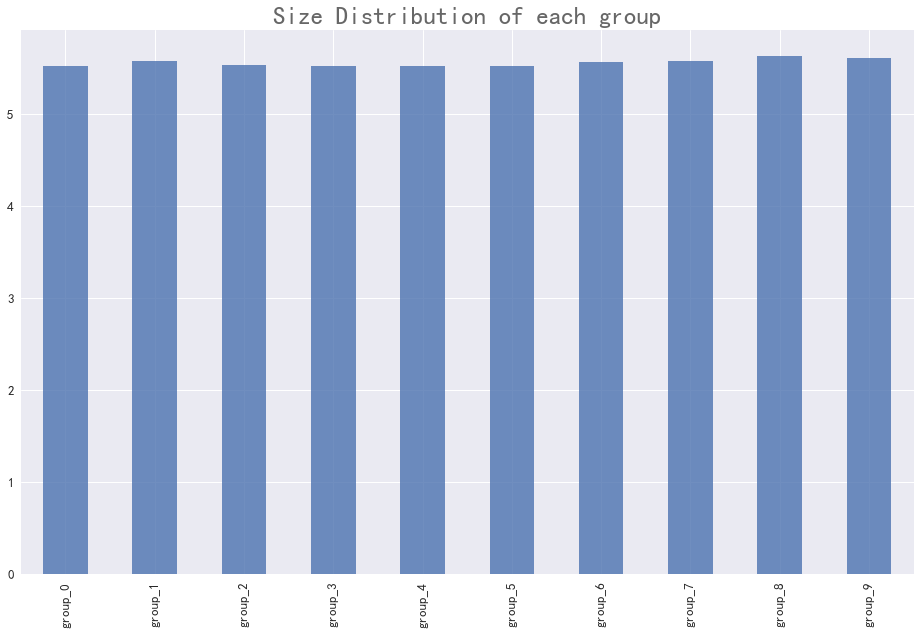

In [3190]:
# show size distribution(quantile plot)
fig = plt.figure(figsize=(16,10))
# Add a subplot
ax = fig.add_subplot(111)
sizeDistribution.median().plot(kind='bar',ax = ax, fontsize =13,title ='Size Distribution of each group',alpha =0.8)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=25)

In [3191]:
sizeDistribution.quantile()
sizeMono = sizeDistribution.quantile().corr(pd.Series(index = sizeDistribution.quantile().index,data = range(len(sizeDistribution.quantile()))),\
                                           method = 'spearman')
sizeMono

0.58787878787878778

In [3192]:
# Calc spearman correlation to investigate monotonicity
referSeries = pd.Series(index = ReturnDF.columns, data=range(len(ReturnDF.columns)))
monoDF = pd.DataFrame(index = ReturnDF.index, columns=['Spearman_Cor'], dtype = float)
for date in ReturnDF.index:
    monoDF.loc[date] = ReturnDF.loc[date].corr(referSeries,method='spearman')   

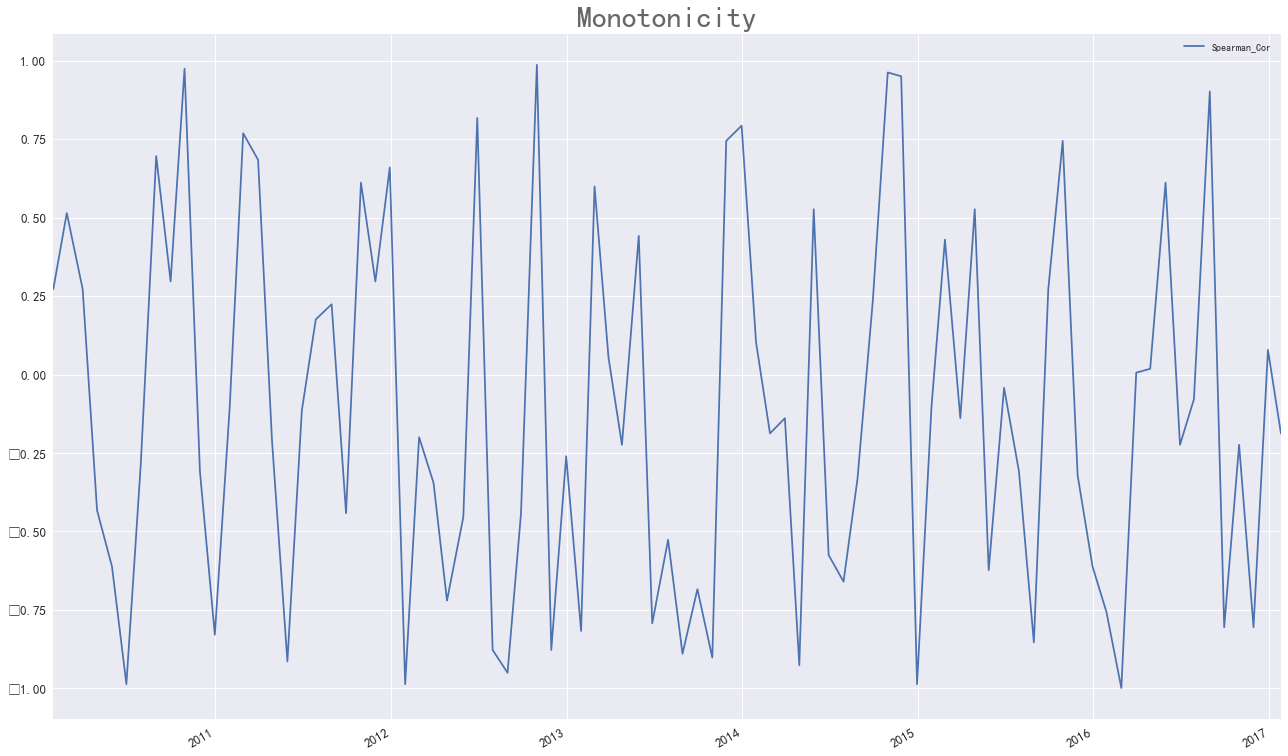

In [3193]:
# Plot
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
monoDF.plot(figsize=(22,14),ax=ax,fontsize =13,title ='Monotonicity')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

In [3194]:
### Method to calculate moving max drawdown
from numpy.lib.stride_tricks import as_strided
def windowed_view(x, window_size):
    """Creat a 2d windowed view of a 1d array.

    `x` must be a 1d numpy array.

    `numpy.lib.stride_tricks.as_strided` is used to create the view.
    The data is not copied.

    Example:

    >>> x = np.array([1, 2, 3, 4, 5, 6])
    >>> windowed_view(x, 3)
    array([[1, 2, 3],
           [2, 3, 4],
           [3, 4, 5],
           [4, 5, 6]])
    """
    y = as_strided(x, shape=(x.size - window_size + 1, window_size),
                   strides=(x.strides[0], x.strides[0]))
    return y

In [3195]:
###
def rolling_max_dd(x, window_size, min_periods=1):
    """Compute the rolling maximum drawdown of `x`.

    `x` must be a 1d numpy array.
    `min_periods` should satisfy `1 <= min_periods <= window_size`.

    Returns an 1d array with length `len(x) - min_periods + 1`.
    """
    if min_periods < window_size:
        pad = np.empty(window_size - min_periods)
        pad.fill(x[0])
        x = np.concatenate((pad, x))
    y = windowed_view(x, window_size)
    #print y
    rolling_max_y = np.maximum.accumulate(y, axis=1)
    #print rolling_max_y
    dd = 1-y/rolling_max_y
    return np.abs(dd).max(axis=1)

In [3196]:
max(rolling_max_dd(ReturnDF['group_0'].values,4, min_periods=1))

63.35687796368839

In [3197]:
# long top group short bot group 
sortGroups = ReturnDF[['group_0','group_9']].cumsum().iloc[-1].sort_values(ascending = False).index
top, bot = sortGroups[0], sortGroups[-1]

# Add another column
ReturnDF['top_bot_comb'] = ReturnDF[top] - ReturnDF[bot]

In [3198]:
top, bot

('group_0', 'group_9')

In [3199]:
ReturnDF.cumsum().tail()

group_0   group_1   group_2   group_3   group_4   group_5  \
2016-09-30  0.386996  0.629895  0.735035  0.801438  0.809457  0.941799   
2016-10-31  0.379257  0.641615  0.748827  0.813237  0.817214  0.965936   
2016-11-30  0.422434  0.665621  0.766307  0.819123  0.824462  0.971747   
2016-12-30  0.414878  0.653164  0.762555  0.812932  0.821867  0.967476   
2017-01-26  0.421865  0.652540  0.768745  0.815423  0.825506  0.974129   

             group_6   group_7   group_8   group_9  top_bot_comb  
2016-09-30  0.694914  0.422390  0.344785 -0.422923      0.809919  
2016-10-31  0.712116  0.419391  0.349141 -0.436829      0.816086  
2016-11-30  0.716389  0.423070  0.357764 -0.450608      0.873042  
2016-12-30  0.715488  0.419283  0.352234 -0.482427      0.897305  
2017-01-26  0.719536  0.426336  0.355047 -0.485248      0.907113

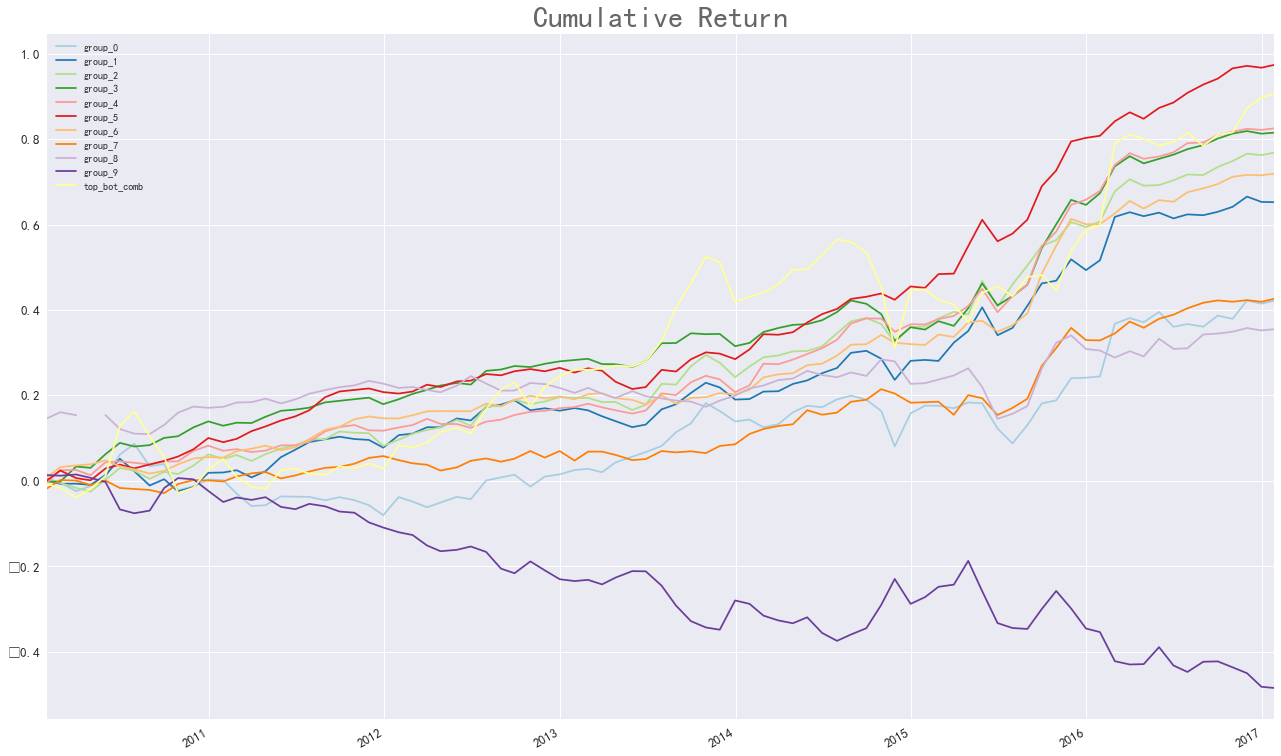

In [3200]:
# simple cumulative return 
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
ReturnDF.astype(float).cumsum().plot(figsize=(22,14),ax=ax,  color=sns.color_palette("Paired",11),fontsize =13,title ='Cumulative Return')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

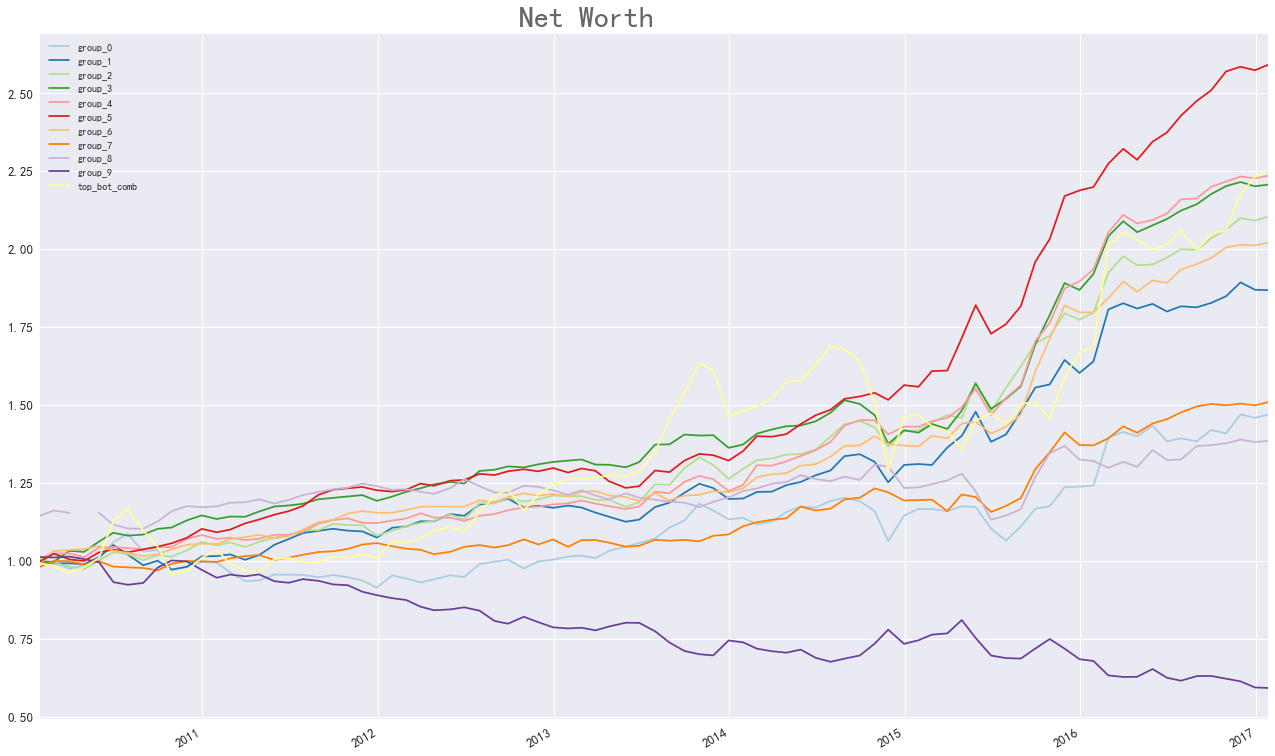

In [3201]:
# Net worth plot 
netWorthDF = (ReturnDF.astype(float)+1).cumprod()
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
netWorthDF.plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",11),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [3202]:
# Calc spearman correlation to investigate monotonicity
referSeries = pd.Series(index = netWorthDF.iloc[:,:-1].columns, data=range(len(netWorthDF.iloc[:,:-1].columns)))
monoDF = pd.DataFrame(index = netWorthDF.index, columns=['Spearman_Cor'], dtype = float)
for date in netWorthDF.index:
    monoDF.loc[date] = netWorthDF.iloc[:,:-1].loc[date].corr(referSeries,method='spearman')   

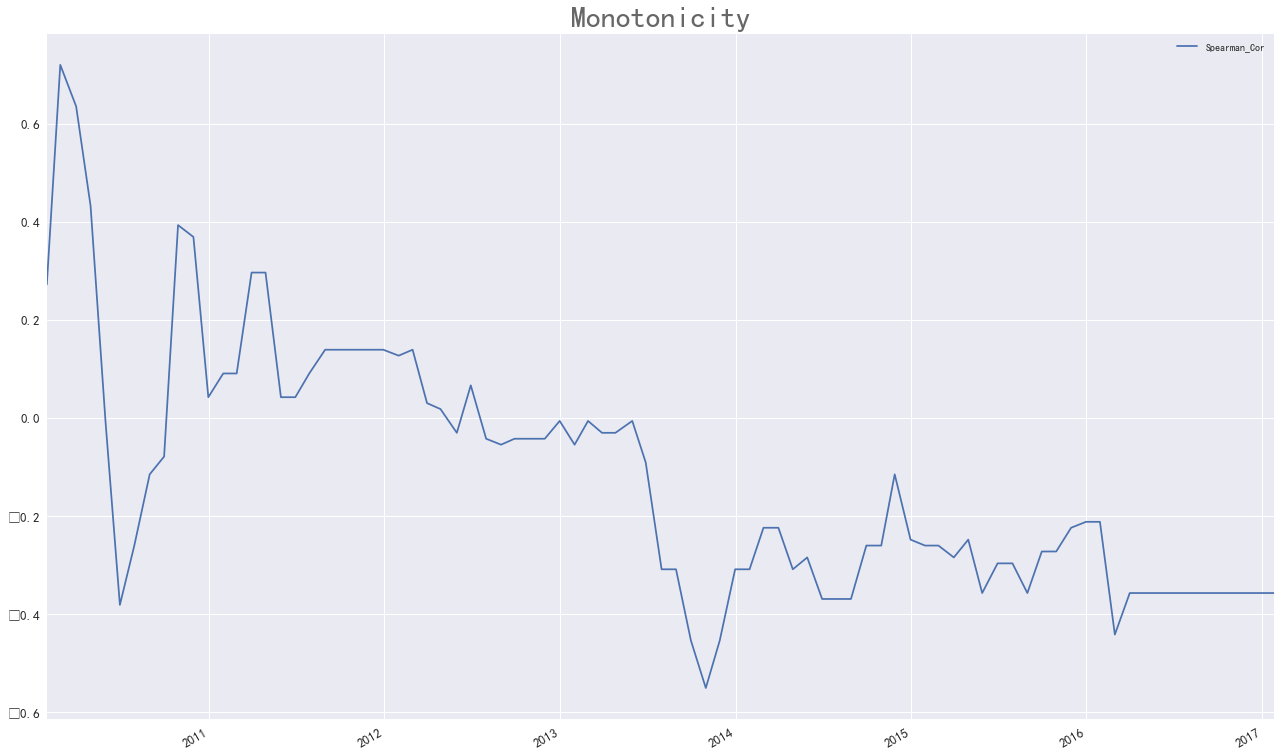

In [3203]:
# Plot
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
monoDF.plot(figsize=(22,14),ax=ax,fontsize =13,title ='Monotonicity')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

In [3204]:
# monotonicity information 
print monoDF.std()
print monoDF.median()

Spearman_Cor    0.255514
dtype: float64
Spearman_Cor   -0.212121
dtype: float64


In [3205]:
# basic indicator
annualizedReturn = (1+ReturnDF.mean())**12 - 1
annualizedVol = ReturnDF.std()* np.sqrt(12)
sharpeRatio = annualizedReturn / annualizedVol 
print 'Annual Return:','\n',annualizedReturn,'\n\n','Annual Volatility:','\n',annualizedVol,'\n\n','Sharpe Ratio:''\n',sharpeRatio

Annual Return: 
group_0         0.061210
group_1         0.096114
group_2         0.114093
group_3         0.121391
group_4         0.122973
group_5         0.146532
group_6         0.106447
group_7         0.061877
group_8         0.051917
group_9        -0.066395
top_bot_comb    0.135854
dtype: float64 

Annual Volatility: 
group_0         0.101559
group_1         0.084355
group_2         0.078096
group_3         0.075617
group_4         0.070358
group_5         0.069208
group_6         0.061696
group_7         0.061293
group_8         0.091322
group_9         0.099552
top_bot_comb    0.162293
dtype: float64 

Sharpe Ratio:
group_0         0.602707
group_1         1.139396
group_2         1.460937
group_3         1.605334
group_4         1.747822
group_5         2.117270
group_6         1.725358
group_7         1.009537
group_8         0.568504
group_9        -0.666940
top_bot_comb    0.837090
dtype: float64


In [3206]:
copyReturn = ReturnDF.copy()
copyReturn [copyReturn > copyReturn .mean()] =0
downsideRisk = ReturnDF.std(skipna = True) * np.sqrt(12)
downsideRisk

group_0         0.101559
group_1         0.084355
group_2         0.078096
group_3         0.075617
group_4         0.070358
group_5         0.069208
group_6         0.061696
group_7         0.061293
group_8         0.091322
group_9         0.099552
top_bot_comb    0.162293
dtype: float64

In [3207]:
sortinoRatio = annualizedReturn / downsideRisk
sortinoRatio

group_0         0.602707
group_1         1.139396
group_2         1.460937
group_3         1.605334
group_4         1.747822
group_5         2.117270
group_6         1.725358
group_7         1.009537
group_8         0.568504
group_9        -0.666940
top_bot_comb    0.837090
dtype: float64

In [3208]:
# Max drawdown
maxdd = netWorthDF.copy()
maxdd.iloc[0] = 0
for date in netWorthDF.index[1:]:
    maxdd.loc[date] = 1-netWorthDF.loc[date]/netWorthDF.loc[:date].max()
maxddInfo = pd.concat([maxdd.max(),maxdd.idxmax()],axis=1)
maxddInfo.columns = ['Max_drawdown','Time']
maxddInfo

Max_drawdown       Time
group_0           0.158437 2011-12-30
group_1           0.074866 2010-10-29
group_2           0.060058 2015-06-30
group_3           0.092467 2014-11-28
group_4           0.054749 2015-06-30
group_5           0.050355 2015-06-30
group_6           0.030733 2010-08-31
group_7           0.061240 2015-06-30
group_8           0.134904 2015-06-30
group_9           0.415148 2017-01-26
top_bot_comb      0.236858 2014-11-28

In [3209]:
# calmar Ratio
calmarRatio = annualizedReturn/ maxddInfo['Max_drawdown']
calmarRatio 

group_0         0.386340
group_1         1.283809
group_2         1.899722
group_3         1.312802
group_4         2.246124
group_5         2.909990
group_6         3.463624
group_7         1.010402
group_8         0.384842
group_9        -0.159931
top_bot_comb    0.573566
dtype: float64

In [3210]:
ReturnForPlot =ReturnDF.copy()

In [3211]:
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(1+x.month) if x.month < 12 else\
                                             100*(x.year+1)+1) ### this shows the real time

In [3212]:
### the following part is to save return data of every factor into one Dataframe

In [3213]:
#---------------- the following part shows the show the difference of a risk factor across different market capitalzation size----#
#-------------  and different industries ------#

In [3214]:
# show the difference of a risk factor through different market capitalzation size
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the tuple of the groups
# Inputs: 
# capdata: DATAFRAME ,the LFCAP DATA
# datelist: LIST, the datelist of the end month
def getGroupsbyCap(capdata, datelist):
    capdict ={}
    for date in datelist:
        capdataindice = capdata.loc[date]
        lower = capdataindice.quantile(1/3)
        upper = capdataindice.quantile(2/3)
        smallcap = capdataindice[capdataindice<=lower].index
        midcap = capdataindice[(lower<capdataindice) & (capdataindice<=upper)].index
        hugecap = capdataindice[capdataindice>upper].index
        capdict[date] = (smallcap,midcap,hugecap)
    return capdict

In [3215]:
# industry number
grouplabel = np.random.choice(29,10,replace=False)
grouplabel

array([ 9, 22, 15, 26, 25, 20,  5,  4,  0, 18])

In [3216]:
# show the difference of a risk factor through different industry
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the DICTIONARY of the groups of each industry on that day
# Inputs: 
# datelist: LIST, the datelist of the end month
# grouplable: LIST, the industry label,usually 3 of them is constant and other 3 is randomed  alike [2,3,6,15,18,25]
# industryDF: DATAFRAME,the industry dataframe(could )
def getIndustryDict(datelist,grouplabel,industryDF):
    industrydict = {}
    industryDF = industryDF.loc[datelist]
    for date in datelist:
        industryDFindice = industryDF.loc[date]
        industrydict[date] = {label:industryDFindice[industryDFindice == label].index for label in grouplabel}
    return industrydict

In [3217]:
#------------------------------ Following part is to group  stocks within industry --------------------------

In [3218]:
wholeIndList = np.array(range(29))

wholeIndDict = getIndustryDict(endOfMonthList,wholeIndList,indusDF)

In [3219]:
multindexList = [endOfMonthList,wholeIndList]
induReturnDF  = pd.DataFrame(data=None, columns=totalGroupDict.values()[0].keys(),\
                             index=pd.MultiIndex.from_product(multindexList,names=['time','industry']),dtype=float)

In [3220]:
groupNumberThrottle = 10
for i,j in wholeIndDict.iteritems():
    print i
    factorIndice = factorData.loc[:i].tail()
    factorIndice = factorIndice[list(set(factorIndice.columns.tolist())- set(filterdict[date]))]  # Remove ST ,new and suspend stk
    for ind, stk in j.iteritems():
        intersection = list(set(factorIndice.columns.tolist()) & set(stk))
        if len(intersection) < groupNumberThrottle:
            induReturnDF.loc[i,ind] = 0
            continue
        else:
            stkgroup = ff.getStockGroup(factorIndice[intersection], groupNum=10, Mean_Num=1)
            for p,q in stkgroup.iteritems():
                try:
                    induReturnDF.loc[i,ind][p] = activeReturnData.loc[i][q].mean()
                except:
                    induReturnDF.loc[i,ind][p] = np.NaN

2016-12-30 00:00:00
2010-12-31 00:00:00
2015-05-29 00:00:00
2014-02-28 00:00:00
2012-03-30 00:00:00
2014-07-31 00:00:00
2012-11-30 00:00:00
2016-09-30 00:00:00
2013-07-31 00:00:00
2012-08-31 00:00:00
2014-11-28 00:00:00
2012-07-31 00:00:00
2012-04-27 00:00:00
2016-05-31 00:00:00
2014-05-30 00:00:00
2012-02-29 00:00:00
2013-09-30 00:00:00
2015-02-27 00:00:00
2015-07-31 00:00:00
2011-06-30 00:00:00
2011-05-31 00:00:00
2010-10-29 00:00:00
2010-11-30 00:00:00
2013-03-29 00:00:00
2010-07-30 00:00:00
2015-11-30 00:00:00
2012-05-31 00:00:00
2011-11-30 00:00:00
2011-07-29 00:00:00
2015-12-31 00:00:00
2011-02-28 00:00:00
2013-11-29 00:00:00
2016-03-31 00:00:00
2015-06-30 00:00:00
2011-04-29 00:00:00
2010-08-31 00:00:00
2013-01-31 00:00:00
2015-01-30 00:00:00
2011-12-30 00:00:00
2010-03-31 00:00:00
2011-03-31 00:00:00
2017-01-26 00:00:00
2011-09-30 00:00:00
2010-04-30 00:00:00
2016-10-31 00:00:00
2011-10-31 00:00:00
2012-06-29 00:00:00
2013-02-28 00:00:00
2014-09-30 00:00:00
2012-12-31 00:00:00


In [3221]:
finalReturn = induReturnDF.mean(level = 'time')
finalReturn.sort_index(axis=1,inplace=True)

In [3222]:
sortGroups = finalReturn[['group_0','group_9']].cumsum().iloc[-1].sort_values(ascending = False).index
top, bot = sortGroups[0], sortGroups[-1]

# Add another column
finalReturn['top_bot_comb'] = finalReturn[top] - finalReturn[bot]

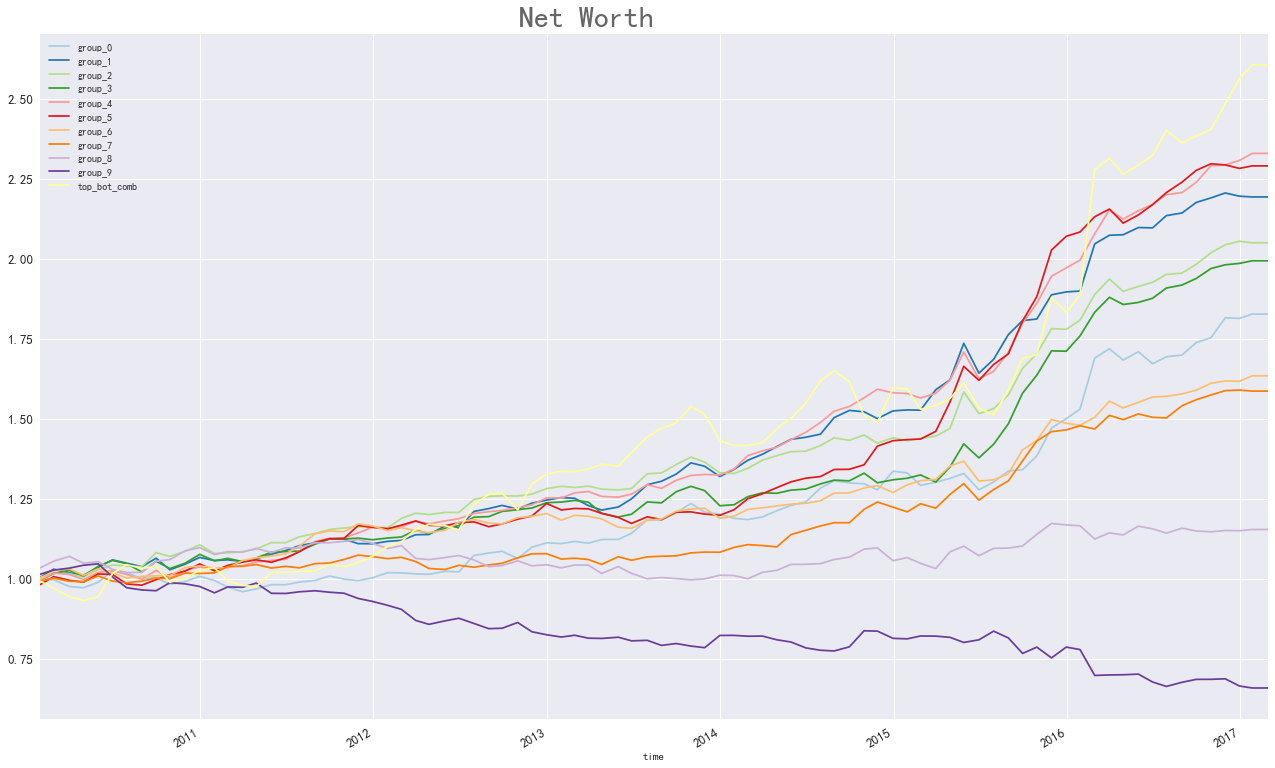

In [3223]:
indNetWorth = (finalReturn+1).cumprod()
fig = plt.figure(figsize=(14,9))
# Add a subplot
ax = fig.add_subplot(111)
indNetWorth.plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",11),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [3224]:
# basic indicator
annualizedReturnNew = (1+finalReturn.mean())**12 - 1
annualizedVolNew = finalReturn.std()* np.sqrt(12)
sharpeRatioNew = annualizedReturnNew / annualizedVolNew 
print 'Annual Return:','\n',annualizedReturnNew,'\n\n','Annual Volatility:','\n',annualizedVolNew,'\n\n','Sharpe Ratio:''\n',sharpeRatioNew

Annual Return: 
group_0         0.090440
group_1         0.118157
group_2         0.107185
group_3         0.103228
group_4         0.126896
group_5         0.124997
group_6         0.072362
group_7         0.067834
group_8         0.021775
group_9        -0.053692
top_bot_comb    0.151565
dtype: float64 

Annual Volatility: 
group_0         0.072207
group_1         0.066402
group_2         0.059157
group_3         0.064003
group_4         0.055738
group_5         0.067519
group_6         0.052634
group_7         0.050977
group_8         0.056648
group_9         0.078279
top_bot_comb    0.127078
dtype: float64 

Sharpe Ratio:
group_0         1.252515
group_1         1.779400
group_2         1.811872
group_3         1.612844
group_4         2.276648
group_5         1.851295
group_6         1.374811
group_7         1.330695
group_8         0.384396
group_9        -0.685898
top_bot_comb    1.192694
dtype: float64


In [3225]:
copyReturn = finalReturn.copy()
copyReturn[copyReturn > copyReturn.mean()] = 0
downsideRiskNew = copyReturn.std(skipna = True) * np.sqrt(12)
downsideRiskNew

group_0         0.029237
group_1         0.030625
group_2         0.025642
group_3         0.030366
group_4         0.027237
group_5         0.025375
group_6         0.026927
group_7         0.022618
group_8         0.031793
group_9         0.056806
top_bot_comb    0.051992
dtype: float64

In [3226]:
sortinoRatioNew = annualizedReturnNew / downsideRiskNew
sortinoRatioNew

group_0         3.093390
group_1         3.858191
group_2         4.180129
group_3         3.399443
group_4         4.659017
group_5         4.926038
group_6         2.687350
group_7         2.999103
group_8         0.684903
group_9        -0.945178
top_bot_comb    2.915142
dtype: float64

In [3227]:
# Max drawdown
maxdd1 = indNetWorth.copy()
maxdd1.iloc[0] = 0
for date in indNetWorth.index[1:]:
    maxdd1.loc[date] = 1-indNetWorth.loc[date]/indNetWorth.loc[:date].max()
maxddInfo1 = pd.concat([maxdd1.max(),maxdd1.idxmax()],axis=1)
maxddInfo1.columns = ['Max_drawdown','Time']
maxddInfo1

Max_drawdown       Time
group_0           0.064400 2011-03-31
group_1           0.053702 2015-06-30
group_2           0.042998 2015-06-30
group_3           0.047078 2013-12-31
group_4           0.049432 2015-06-30
group_5           0.050490 2013-06-28
group_6           0.045194 2015-06-30
group_7           0.041815 2012-05-31
group_8           0.111986 2013-10-31
group_9           0.370604 2017-01-26
top_bot_comb      0.098339 2014-11-28

In [3228]:
# calmar Ratio
calmarRatioNew = annualizedReturnNew/ maxddInfo1['Max_drawdown']
calmarRatioNew

group_0         1.404359
group_1         2.200208
group_2         2.492771
group_3         2.192695
group_4         2.567049
group_5         2.475680
group_6         1.601142
group_7         1.622243
group_8         0.194445
group_9        -0.144876
top_bot_comb    1.541240
dtype: float64

In [3229]:
def str_to_datetime_format(string):
    return '%Y/%m/%d' if '/'in string else '%Y-%m-%d'

In [3230]:
print  downsideRisk['top_bot_comb'],sortinoRatio['top_bot_comb']

0.162292767479 0.837089813052


In [3231]:
# save factor Information
if np.isnan(monoDF.median().values[0]) and np.isnan(sharpeRatio['top_bot_comb']):
    raise  Exception( 'Error! Please check the original data!')
savepath = 'C:/Users/LZJF_02/Desktop/myownliarbry'
infodata = np.array([[startTime,endTime,monoDF.median().values[0],monoDF.std().values[0],annualizedReturn['top_bot_comb'],annualizedVol['top_bot_comb'],sharpeRatio['top_bot_comb'],\
    downsideRisk['top_bot_comb'],sortinoRatio['top_bot_comb'], maxddInfo['Max_drawdown'].loc['top_bot_comb'],calmarRatio['top_bot_comb']]])
totalInfo = pd. DataFrame(index =[sololist[0].split('.')[0]],columns = ['Start_time','End_time','Mono_median','Mono_std','Annualized_return','Annualized_volatility','Sharpe_ratio','Downside_Risk',
                                                     'Sortino_ratio','Max_drawdown','Calmar_Ratio'],data= infodata)
totalInfo.index.name = 'Factor_Name'
try:
    readfacInfo = pd.read_csv(savepath+'/'+'factorInfo.csv',infer_datetime_format=True,parse_dates=[0],index_col=0)
except:  
    readfacInfo = totalInfo
    readfacInfo.to_csv(savepath+'/'+'factorInfo.csv',na_rep='NaN')
factorName = sololist[0].split('.')[0]
if  factorName in readfacInfo.index:
    print factorName+ ' '+'already in the file!'
    try:
        begin = datetime.strptime(readfacInfo.loc[factorName]['Start_time'].split()[0],str_to_datetime_format(readfacInfo.loc[factorName]['Start_time']))
        end = datetime.strptime(readfacInfo.loc[factorName]['End_time'].split()[0],str_to_datetime_format(readfacInfo.loc[factorName]['End_time']))
    except:
        print 'the time type is already datetime!'
        begin = readfacInfo.loc[factorName]['Start_time']
        end = readfacInfo.loc[factorName]['End_time']
    print begin,startTime, end, endTime
    if  begin > startTime or  end < endTime:
        print  'update needed'
        print  readfacInfo.loc[factorName].values 
        print infodata.flatten()
        readfacInfo.loc[factorName] = infodata.flatten()
    updatedInfo = readfacInfo
else:
    updatedInfo = pd.concat([readfacInfo,totalInfo])
    updatedInfo = updatedInfo.rename(columns = {'End_Time': 'End_time'})
updatedInfo.to_csv(savepath+'/'+'factorInfo.csv',na_rep='NaN')

In [3232]:
updatedInfo

Start_time  \
Factor_Name                                                         
Own_Factor_Turnover_Volatility_deviation_20D  2010-01-01 00:00:00   
Own_Factor_ILLQ-1d                            2010-01-01 00:00:00   
Own_Factor_Idiosyncratic_Volatility           2010-01-01 00:00:00   
Own_Factor_ADJ_Turnover_Volatility_20D        2010-01-01 00:00:00   
LZ_GPA_VAL_PE                                 2010-01-01 00:00:00   
LZ_GPA_VAL_PB                                 2010-01-01 00:00:00   
LZ_GPA_VAL_PS                                 2010-01-01 00:00:00   
LZ_GPA_FIN_IND_QFA_YOYGR                      2010-01-01 00:00:00   
LZ_GPA_FIN_IND_YOYBPS                         2010-01-01 00:00:00   
LZ_GPA_FIN_IND_QFA_YOYNETPROFIT               2010-01-01 00:00:00   
LZ_GPA_FIN_IND_CAPITALIZEDTODA                2010-01-01 00:00:00   
LZ_GPA_FIN_IND_CASHRATIO                      2010-01-01 00:00:00   
LZ_GPA_DERI_Momentum_1M                       2010-01-01 00:00:00   
LZ_GPA_TURNOVER_TurnoverAvg_3M                2010-01-01 00:00:00   
LZ_GPA_VAL_TURN                               2010-01-01 00:00:00   
Own_Factor_Volatility_90d                     2010-01-01 00:00:00   
Own_Factor_DDA-20d                            2010-01-01 00:00:00   
Own_Factor_Skewness_250d                      2010-01-01 00:00:00   
LZ_GPA_FIN_IND_OCFTODEBT                      2010-01-01 00:00:00   
Own_Factor_Return_Skew_250D                   2010-01-01 00:00:00   
Own_Factor_5_20_return_deviation_1D           2010-01-01 00:00:00   
Own_Factor_downside_risk_252D                 2010-01-01 00:00:00   
Own_Factor_sortino_ratio_20D                  2010-01-01 00:00:00   
Own_Factor_excess_return_20D                  2010-01-01 00:00:00   
Uqer_factor_AD20                              2010-01-01 00:00:00   
Uqer_factor_ADTM                              2010-01-01 00:00:00   
Uqer_factor_ATR6                              2010-01-01 00:00:00   
Uqer_factor_Aroon                             2010-01-01 00:00:00   
Uqer_factor_BIAS10                            2010-01-01 00:00:00   

                                                         End_time Mono_median  \
Factor_Name                                                                     
Own_Factor_Turnover_Volatility_deviation_20D  2017-02-28 00:00:00   -0.927273   
Own_Factor_ILLQ-1d                            2017-02-28 00:00:00    0.987879   
Own_Factor_Idiosyncratic_Volatility           2017-02-28 00:00:00    -0.90303   
Own_Factor_ADJ_Turnover_Volatility_20D        2017-02-28 00:00:00          -1   
LZ_GPA_VAL_PE                                 2017-02-28 00:00:00    0.757576   
LZ_GPA_VAL_PB                                 2017-02-28 00:00:00   -0.115152   
LZ_GPA_VAL_PS                                 2017-02-28 00:00:00     0.10303   
LZ_GPA_FIN_IND_QFA_YOYGR                      2017-02-28 00:00:00    0.939394   
LZ_GPA_FIN_IND_YOYBPS                         2017-02-28 00:00:00         0.2   
LZ_GPA_FIN_IND_QFA_YOYNETPROFIT               2017-02-28 00:00:00    0.890909   
LZ_GPA_FIN_IND_CAPITALIZEDTODA                2017-02-28 00:00:00    0.248485   
LZ_GPA_FIN_IND_CASHRATIO                      2017-02-28 00:00:00    0.842424   
LZ_GPA_DERI_Momentum_1M                       2017-02-28 00:00:00   -0.975758   
LZ_GPA_TURNOVER_TurnoverAvg_3M                2017-02-28 00:00:00    -0.50303   
LZ_GPA_VAL_TURN                               2017-02-28 00:00:00   -0.660606   
Own_Factor_Volatility_90d                     2017-02-28 00:00:00   -0.369697   
Own_Factor_DDA-20d                            2017-02-28 00:00:00   -0.987879   
Own_Factor_Skewness_250d                      2017-02-28 00:00:00   -0.951515   
LZ_GPA_FIN_IND_OCFTODEBT                      2017-02-28 00:00:00   -0.151515   
Own_Factor_Return_Skew_250D                   2017-02-28 00:00:00   -0.915152   
Own_Factor_5_20_return_deviation_1D           2017-02-28 00:00:00   -0.115152   
Own_Factor_downside_risk_252D                 2017-0

In [3233]:
'''define the risk preference weight indice before perform kmeans clustering'''

'define the risk preference weight indice before perform kmeans clustering'

In [3234]:
mat =updatedInfo.dropna(axis=0).iloc[:,2:].as_matrix()
# Using sklearn
km = KMeans(n_clusters=3)
result = km.fit(mat)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame(data=labels, columns=['cluster'],index = updatedInfo.index)

In [3235]:
results.groupby(['cluster'])

In [3236]:
for name,group in results.groupby(['cluster']):
    print group

                                     cluster
Factor_Name                                 
LZ_GPA_VAL_PE                              0
LZ_GPA_VAL_PB                              0
LZ_GPA_VAL_PS                              0
LZ_GPA_FIN_IND_YOYBPS                      0
LZ_GPA_FIN_IND_CAPITALIZEDTODA             0
LZ_GPA_FIN_IND_CASHRATIO                   0
LZ_GPA_TURNOVER_TurnoverAvg_3M             0
Own_Factor_Volatility_90d                  0
Own_Factor_Skewness_250d                   0
LZ_GPA_FIN_IND_OCFTODEBT                   0
Own_Factor_5_20_return_deviation_1D        0
Own_Factor_downside_risk_252D              0
Own_Factor_sortino_ratio_20D               0
Own_Factor_excess_return_20D               0
Uqer_factor_AD20                           0
Uqer_factor_ADTM                           0
Uqer_factor_BIAS10                         0
                                              cluster
Factor_Name                                          
Own_Factor_Turnover_Volatility_deviat

In [3237]:
(maxddInfo1-maxddInfo)

Max_drawdown       Time
group_0          -0.094037  -274 days
group_1          -0.021164  1705 days
group_2          -0.017060     0 days
group_3          -0.045389  -332 days
group_4          -0.005317     0 days
group_5           0.000135  -732 days
group_6           0.014461  1764 days
group_7          -0.019425 -1125 days
group_8          -0.022918  -607 days
group_9          -0.044544     0 days
top_bot_comb     -0.138518     0 days

In [3238]:
#--------------------------------------  Section End   -------------------------------------

In [3239]:
industryDict = getIndustryDict(endOfMonthList,grouplabel,indusDF)

In [3240]:
capDict=getGroupsbyCap(LFCAPDF,endOfMonthList)

In [3241]:
templist=[endOfMonthList,['mean','median','std']]
capGroupsDF = pd.DataFrame(data=None, columns=['small','mid','huge'],index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)
indusGroupDF  = pd.DataFrame(data=None, columns=grouplabel,index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)

In [3242]:
for date in endOfMonthList:
    factorindice = factorData.loc[date]
    smallindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][0]))]
    midindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][1]))]
    hugeindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][2]))]
    capGroupsDF.loc[date,'small'] = [smallindice.mean(),smallindice.median(),smallindice.std()]
    capGroupsDF.loc[date,'mid'] = [midindice.mean(),midindice.median(),midindice.std()]
    capGroupsDF.loc[date,'huge'] = [hugeindice.mean(),hugeindice.median(),hugeindice.std()]
    for i in grouplabel:
        #print grouplabel
        inDFIndice = factorindice.loc[list(set(factorindice.index) & set(industryDict[date][i]))]
        indusGroupDF.loc[date,i] = [inDFIndice.mean(),inDFIndice.median(),inDFIndice.std()]
indusGroupDF.rename(columns = {i:u''+explanationDict[i]+'' for i in grouplabel},inplace=True)

In [3243]:
indusGroupDF

机械       房地产        家电       计算机        通信        银行  \
time       stats                                                                
2010-01-29 mean   -4.643030 -4.773407 -2.543137 -2.975657 -3.804786 -1.974751   
           median -4.973350 -4.767200 -2.991900 -3.011600 -3.651700 -2.694000   
           std     2.813929  1.158971  3.401395  2.682464  3.135125  4.653534   
2010-02-26 mean    4.535646  0.420600  3.337663  4.891657  4.482086  5.258402   
           median  3.958900  0.247600  2.847500  4.690050  4.221100  4.479700   
           std     2.697028  2.787153  2.891090  2.074931  3.254066  3.158812   
2010-03-31 mean    1.581388  0.320431  2.169367  2.905898  3.771616  0.417211   
           median  1.209750 -0.252050  1.520400  1.698300  3.376000  0.533900   
           std     2.521484  1.847192  2.527207  4.110083  3.207203  2.961215   
2010-04-30 mean   -7.208130 -2.160062 -6.732937 -7.796238 -7.097935 -6.900583   
           median -7.570950 -2.191650 -6.907800 -8.508100 -7.865050 -7.456600   
           std     3.608691  2.307307  4.414264  4.536105  4.893476  4.185643   
2010-05-31 mean   -0.021600 -2.494759  1.217408  0.679113  0.858012  0.914731   
           median -0.568900 -2.949500  1.019300  0.309500 -0.045550  0.222100   
           std     2.617671  1.565166  2.339076  3.080192  4.366020  3.644462   
2010-06-30 mean   -7.934930 -5.757612 -7.363067 -8.339909 -8.022252 -8.582849   
           median -8.398700 -6.376300 -8.545600 -8.522200 -7.954150 -8.556100   
           std     3.688969  3.967126  3.332888  3.557529  4.530882  3.619060   
2010-07-30 mean    3.227572  2.995788  4.006558  2.897737  3.543576  4.002623   
           median  3.106700  3.221200  3.384050  2.511800  3.414400  3.704500   
           std     2.354698  2.188429  2.572822  2.118114  2.641017  2.496524   
2010-08-31 mean    2.050547 -1.484371  5.102858  4.165620  4.177080  4.480861   
           median  1.795300 -2.109200  4.774750  3.613550  3.142000  3.571500   
           std     2.955313  2.446084  2.960294  3.578192  4.807055  4.676929   
2010-09-30 mean   -1.026214 -0.535700 -0.290129 -1.273019 -0.906108  0.534539   
           median -1.221200 -0.500250 -1.009400 -1.241500 -1.329000 -0.224000   
           std     2.770962  2.012170  3.851125  3.165227  3.391619  4.364887   
2010-10-29 mean    1.669716 -2.497011  1.923033  4.290428  6.984979  2.560408   
           median  1.670700 -2.791700  1.729250  3.916200  5.935650  1.634300   
           std     2.561305  2.197110  3.771584  4.110993  6.256877  3.966409   
...                     ...       ...       ...       ...       ...       ...   
2016-05-31 mean    3.735487  6.493988  3.248723  5.409370  5.792255  2.613727   
           median  3.184700  6.775050  3.285300  5.623150  5.812800  3.140400   
           std     3.029020  2.279520  1.639182  4.489806  5.094517  3.735432   
2016-06-30 mean    2.176665  2.644458  1.131769  2.456166  1.800120  2.008183   
           median  1.579100  2.411000  1.568450  2.708400  1.322300  1.862800   
           std     3.944026  2.286954  3.440826  4.580075  4.798724  3.525706   
2016-07-29 mean   -2.372343 -2.602408 -0.442358 -3.855134 -5.314883 -2.130727   
           median -3.260550 -2.789400 -1.124750 -4.604150 -5.450300 -3.497350   
           std     5.607629  3.975707  4.374826  5.292307  3.895404  4.272392   
2016-08-31 mean    1.191248  0.533829  0.702465  0.155298 -0.083419  0.808035   
           median  0.409800  0.363650  0.417300 -0.670800 -0.183100  0.270400   
           std     3.905112  1.455326  2.878363  3.848184  3.278934  3.098726   
2016-09-30 mean    0.868011  0.503742 -0.903242  0.316816 -0.197679  0.383515   
           median -0.284300  0.236050 -1.719900  0.244850 -0.420200  0.069850   
           std     3.795205  2.179976  2.748762  3.073993  2.545294  3.218610   
2016-10-31 mean    0.369176  1.784612 -0.636242 -1.180427 -0.869511  0.108148   
           median -0.626800  0.966200 -0.786200 -1.75030

In [3244]:
capGroupsDF.head()

small       mid      huge
time       stats                               
2010-01-29 mean   -2.389254 -3.103653 -3.096051
           median -0.919350 -3.547100 -3.713300
           std     3.502592  3.703095  6.326790
2010-02-26 mean    2.987189  4.328937  3.906162
           median  2.597000  3.791500  3.333500

In [3245]:
from numpy import fromfile, dtype
from pandas import DataFrame
dt = dtype([('date', 'int'), ('time', '<i4'), ('code', 'string'),('current','int'),('amt','float'),('volume',int),('open','float64'),('high','float64'),('low','float64'),('close','float')])
records = fromfile('D:/cStrategy/data/StockIndexFutures/1M/IF1706', dt)
df = DataFrame(records)

In [3246]:
df

date        time code     current            amt      volume  \
0       33554432    10629889       128070401   7.351163e+40  1727703104   
1              0          64                0  4.778310e-299    10629889   
2    -1701209703    13904961                0  3.038652e-319           0   
3    -1701209703 -1716672448    � -1701209703  9.359878e-315       61503   
4    -1701209703  1722198080    f  1717986918  1.903599e+185  1487947073   
5     1717986918  1722198080    f  1717986918  1.903599e+185  1722198080   
6     1013776640  1722198080    f  1717986918   4.667261e-62  1722198080   
7      134217728    10629889      -1603469056   4.667261e-62    13281344   
8              0           0        150994944  2.463043e-287  1723115584   
9              0          64                0  1.065599e-255    10629889   
10             0  -252564415                0  3.038652e-319           0   
11             0    11708480                0  1.267712e-314       61503   
12             0    11708480                0  6.238065e-317   352074817   
13             0  1723902016    f  1717986918  1.903599e+185  1723115584   
14    -126942976  1723115584    f  1717986918  -6.065988e+66  1723115584   
15     335544320    10629889       1550844160  -6.065988e+66  -859264960   
16             0           0        402653184  -2.560625e+02  -859264960   
17             0        4160                0  8.086349e-174    10629889   
18             0   873020737                0  3.162020e-322           0   
19   -1701209703 -1715361728    � -1701209703  1.823792e-314          64   
20    1717986918 -1715361728    � -1701209703  1.903599e+185  -805098175   
21    1717986918   868460608    3   858993459   4.667261e-62   868460608   
22   -1267597056   868460608    3   858993459   4.667261e-62   868460608   
23     587202560    10629889        410190080   4.667261e-62   868460608   
24             0           0        603979776  2.963185e+291   868460608   
25             0           0                0  2.751642e-135    10629889   
26     858993459           0                0   0.000000e+00           0   
27    1717986918  1723770944    f  1717986918  2.735117e-315       61503   
28     858993459 -1715623872    � -1701209703   4.667261e-62   553598017   
29     858993459   868198464    3   858993459   4.667261e-62   868198464   
...          ...         ...  ...         ...            ...         ...   
1615 -1358888960   128070401      -1003552256  -6.065988e+66  -859789248   
1616           0           0      -1358888960  4.062690e-115  -859789248   
1617           0           0                0  -2.800271e-82   128070401   
1618  -842216244           0                0   0.000000e+00           0   
1619  -842216244  -859789248    �  -842216244   0.000000e+00           0   
1620  -842216244    12232768                0  6.043790e-317  -117887935   
1621           0    12232768                0  6.043790e-317    12232768   
1622   473039360    12232768                0  6.043790e-317    12232768   
1623 -1342111744   128070401      -2144206336  6.043790e-317    12232768   
1624           0           0      -1342111744 -4.453880e+174    12232768   
1625           0           0                0  -1.835186e-77   128070401   
1626           0           0                0   0.000000e+00           0   
1627           0    12232768                0   0.000000e+00           0   
1628           0    12232768                0  6.043790e-317           0   
1629           0    12232768                0  6.043790e-317    12232768   
1630  -667680256    12232768                0  6.043790e-317    12232768   
1631 -1308557312   128070401       1010106880  6.043790e-317    12232768   
1632           0           0      -1308557312 -1.566834e-153    12232768   
1633           0           0                0  -7.882063e-68   128070401   
1634           0           0                0   0.000000e+00           0   
1635           0    12232768                0   0.000000e+00

In [3247]:
newstack = capGroupsDF.stack().unstack('stats').reset_index()
newstack = newstack.rename(columns = {'level_1':'cap'})
newstack = newstack.pivot_table(index='time',columns='cap')

In [3248]:
newstack.head()

stats           mean                       median                         std  \
cap             huge       mid     small     huge      mid    small      huge   
time                                                                            
2010-01-29 -3.096051 -3.103653 -2.389254 -3.71330 -3.54710 -0.91935  6.326790   
2010-02-26  3.906162  4.328937  2.987189  3.33350  3.79150  2.59700  5.834188   
2010-03-31  1.654686  1.876431  1.879669  0.87550  1.10320  0.43680  5.906402   
2010-04-30 -4.757407 -6.798504 -5.082957 -4.87235 -7.52695 -5.49940  6.829539   
2010-05-31  0.383386  0.610530  0.789395 -0.36170  0.00000  0.00000  6.011245   

stats                           
cap              mid     small  
time                            
2010-01-29  3.703095  3.502592  
2010-02-26  3.673171  3.406114  
2010-03-31  3.445267  3.087137  
2010-04-30  4.784737  5.238856  
2010-05-31  3.533105  3.472720

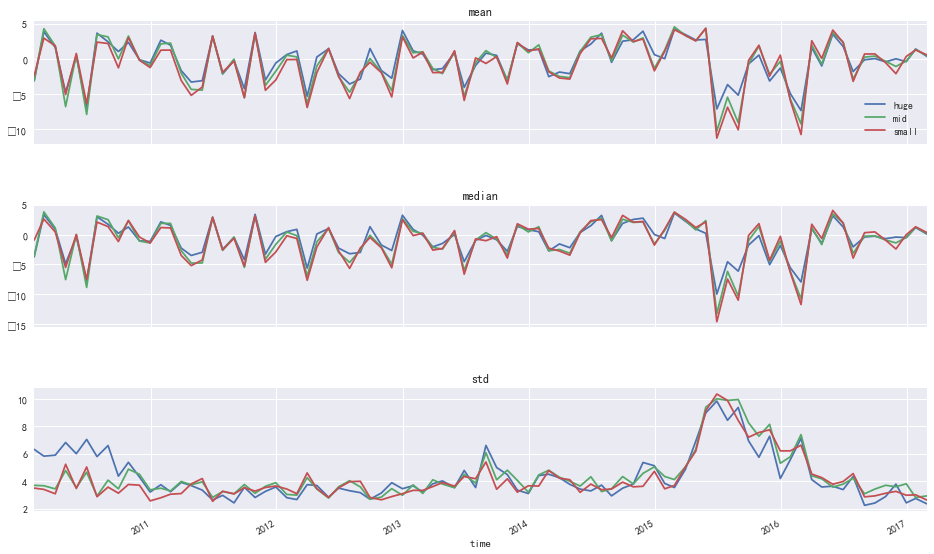

In [3249]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstack.columns.levels[0],range(len(newstack.columns.levels[0]))):
    newstack[label].plot(ax=axs[num],legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [3250]:
newstackInd = indusGroupDF.stack().unstack('stats').reset_index()
newstackInd = newstackInd.rename(columns = {'level_1':'industry'})
newstackInd = newstackInd.pivot_table(index='time',columns='industry')

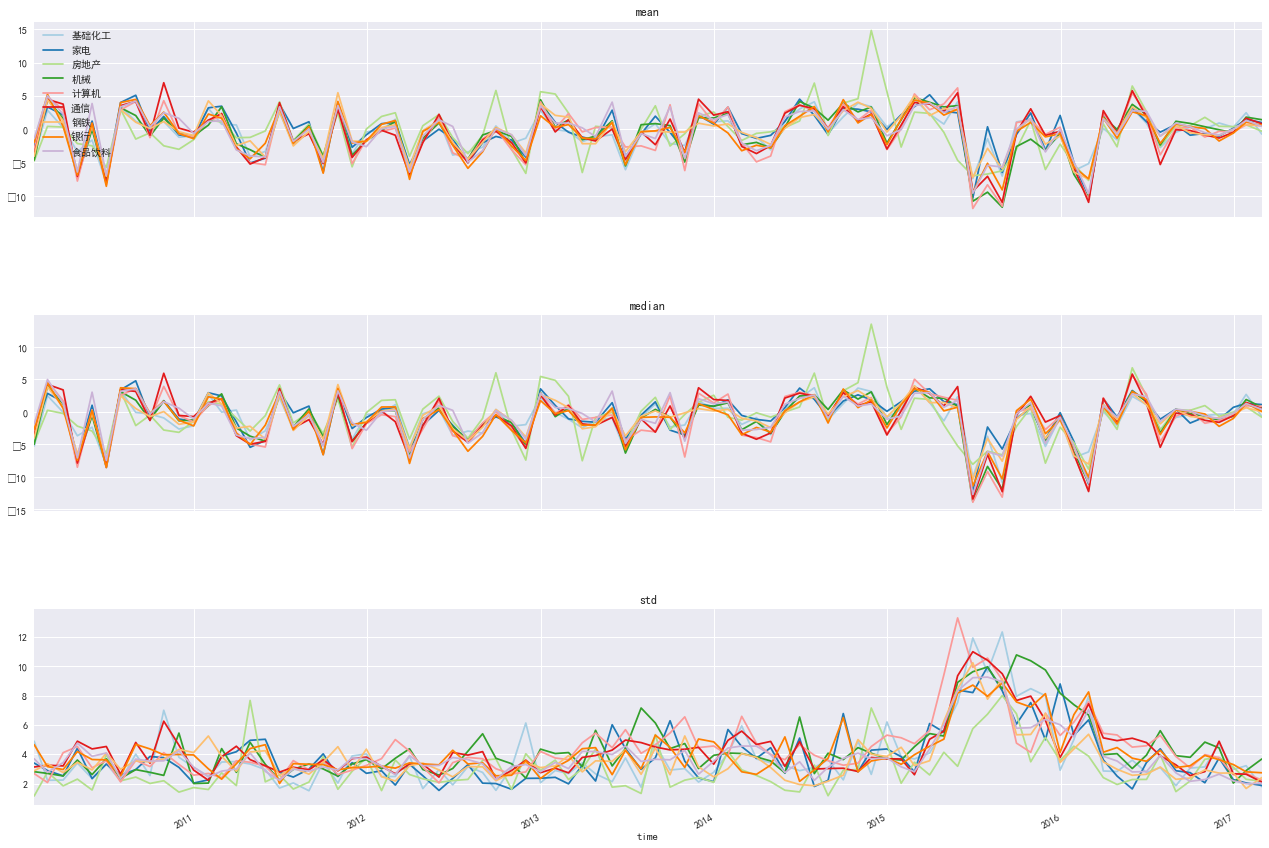

In [3251]:
fig, axs = plt.subplots(3,1, figsize=(22, 16), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstackInd.columns.levels[0],range(len(newstackInd.columns.levels[0]))):
    newstackInd[label].plot(ax=axs[num],color=sns.color_palette("Paired",10),legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [3252]:
capcopy=capGroupsDF.copy()
copydata=capcopy.reset_index()

In [3253]:
copydata.pivot_table(index='time',columns='stats').head()

small                          mid                     \
stats           mean   median       std      mean   median       std   
time                                                                   
2010-01-29 -2.389254 -0.91935  3.502592 -3.103653 -3.54710  3.703095   
2010-02-26  2.987189  2.59700  3.406114  4.328937  3.79150  3.673171   
2010-03-31  1.879669  0.43680  3.087137  1.876431  1.10320  3.445267   
2010-04-30 -5.082957 -5.49940  5.238856 -6.798504 -7.52695  4.784737   
2010-05-31  0.789395  0.00000  3.472720  0.610530  0.00000  3.533105   

                huge                     
stats           mean   median       std  
time                                     
2010-01-29 -3.096051 -3.71330  6.326790  
2010-02-26  3.906162  3.33350  5.834188  
2010-03-31  1.654686  0.87550  5.906402  
2010-04-30 -4.757407 -4.87235  6.829539  
2010-05-31  0.383386 -0.36170  6.011245

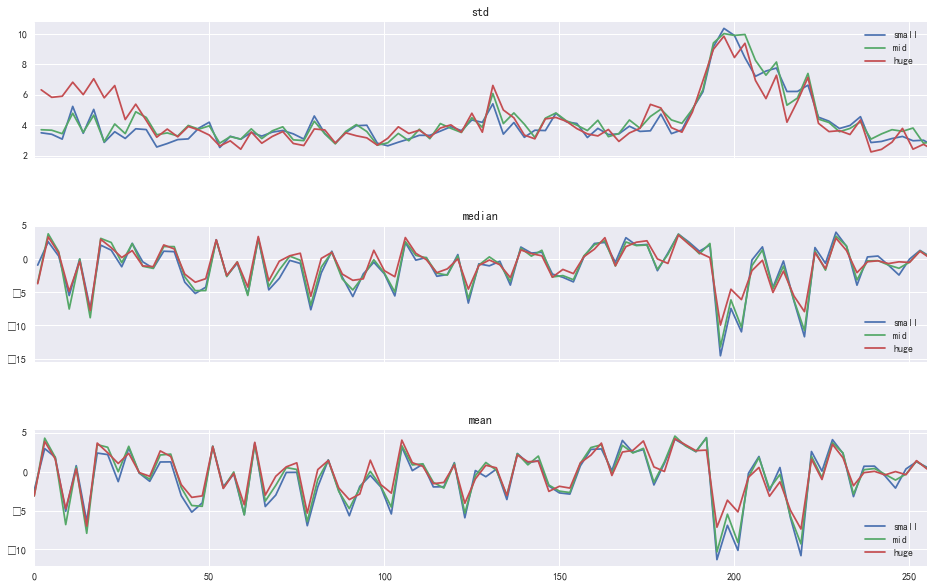

In [3254]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(set(copydata['stats']),range(len(set(copydata['stats'])))):
    #print label,num
    dataslice = copydata[copydata['stats']==label]
    dataslice.plot(ax=axs[num])
    axs[num].set_title(label)